In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
np.random.seed(2019)

In [3]:
pd.set_option('display.max_columns', None)

In [33]:
#import clean and cat data
directory = os.getcwd()

OG = pd.read_csv(directory + '/EMS_2017_2018_cat_final_onehot.csv', sep=',')

In [34]:
OG = OG.drop(["INCIDENT_RESPONSE_SECONDS_QY"], 1)

In [35]:
##FINAL DATASET
data_wrk = OG.sample(n = 1000)

In [36]:
len(data_wrk.columns)

603

In [37]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
X = data_wrk.drop('INCIDENT_TRAVEL_TM_SECONDS_QY', axis=1)
Y = data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

# L1

L1-regularization ends up zeroing out many coefficients. Since these coefficients are the multiplicative weights on the features, L1-regularization effectively performs an automatic form of feature selection.

First I specify the Logistic Regression model, and I make sure I select the Lasso (L1) penalty.Then I use the selectFromModel object from sklearn, which will select in theory the features which coefficients are non-zero.



What is C?
Keep in mind that increasing the penalisation c will increase the number of features removed. Therefore, we will need to keep an eye and monitor that we don’t set a penalty too high so that to remove even important features, or too low and then not remove non-important features.

So True is for the features that lasso thought is important (non-zero features) while False is for the features whose weights were shrinked to zero and are not important according to Lasso.

In [38]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [39]:
#Scaling the data, as linear models benefits from feature scaling
scaler = StandardScaler()
scaler.fit(X_train.fillna(0)) #.fillna(0)

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_train.fillna(0)), Y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [40]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [41]:
np.set_printoptions(threshold=np.inf)

rem_feat = X_train.columns[(sel_.get_support() == False)]
rem_feat = np.array(rem_feat)


In [42]:
len(rem_feat)

157

In [43]:
data_wrk = data_wrk.drop(list(rem_feat),1)
len(data_wrk.columns)

446

In [44]:
L1_sel = list(data_wrk.columns)
L1_sel.remove('INCIDENT_TRAVEL_TM_SECONDS_QY')

In [45]:
X = data_wrk.drop('INCIDENT_TRAVEL_TM_SECONDS_QY', axis=1)
Y = data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [46]:
len(X_train.columns)

445

# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

In [47]:
clf_def = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 20)
clf_def = clf_def.fit(X_train, Y_train)
dt_pred = clf_def.predict_proba(X_test)

In [48]:
importances = clf_def.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

In [49]:
feature_mi_dict = dict(zip(features, importances))
feature_mi_dict

{'10000.0': 0.0,
 '10001.0': 0.0,
 '10002.0': 0.0,
 '10003.0': 0.0,
 '10004.0': 0.0,
 '10006.0': 0.0,
 '10007.0': 0.0,
 '10009.0': 0.0,
 '10010.0': 0.0,
 '10011.0': 0.0,
 '10012.0': 0.0,
 '10013.0': 0.0,
 '10014.0': 0.0,
 '10016.0': 0.0,
 '10017.0': 0.0,
 '10018.0': 0.0,
 '10019.0': 0.0,
 '10021.0': 0.0,
 '10022.0': 0.0,
 '10023.0': 0.0,
 '10024.0': 0.0,
 '10025.0': 0.0,
 '10026.0': 0.0,
 '10027.0': 0.0,
 '10028.0': 0.0,
 '10029.0': 0.0,
 '10030.0': 0.0,
 '10031.0': 0.0,
 '10032.0': 0.0,
 '10033.0': 0.0,
 '10034.0': 0.0,
 '10035.0': 0.0,
 '10036.0': 0.0,
 '10037.0': 0.0,
 '10038.0': 0.0,
 '10039.0': 0.0,
 '10040.0': 0.0,
 '10065.0': 0.0,
 '10075.0': 0.0,
 '10112.0': 0.0,
 '10128.0': 0.0,
 '10301.0': 0.0,
 '10303.0': 0.0,
 '10304.0': 0.0,
 '10305.0': 0.0,
 '10306.0': 0.0,
 '10307.0': 0.0,
 '10308.0': 0.0,
 '10310.0': 0.0,
 '10312.0': 0.0,
 '10314.0': 0.0,
 '10451.0': 0.0,
 '10452.0': 0.0,
 '10453.0': 0.0,
 '10454.0': 0.0,
 '10455.0': 0.0,
 '10456.0': 0.0,
 '10457.0': 0.0,
 '10458.0': 0.

In [50]:
[print(k,v) for k,v in feature_mi_dict.items() if v > 0]

INITIAL_SEVERITY_LEVEL_CODE 0.42577992618793414
DISPATCH_RESPONSE_SECONDS_QY 0.5598566824671866
T14 0.014363391344879258


[None, None, None]

In [51]:
data_wrk1 = data_wrk.drop([ 'DISPATCH_RESPONSE_SECONDS_QY'],1)

X1 = data_wrk1.drop('INCIDENT_TRAVEL_TM_SECONDS_QY', axis=1)
Y1 = data_wrk1['INCIDENT_TRAVEL_TM_SECONDS_QY']

X_train1, X_test1, Y_train1, Y_tes1t = train_test_split(X1, Y1, train_size=.75)

In [52]:
clf_def = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 20)
clf_def = clf_def.fit(X_train1, Y_train1)
dt_pred = clf_def.predict_proba(X_test1)

In [53]:
importances = clf_def.feature_importances_
indices = np.argsort(importances)
features = X_train1.columns

In [54]:
feature_mi_dict = dict(zip(features, importances))

In [55]:
[print(k,v) for k,v in feature_mi_dict.items() if v > 0]

INITIAL_SEVERITY_LEVEL_CODE 0.40553757144609776
T4 0.07506424402106929
T12 0.046652856980523204
T14 0.039110202762403526
T15 0.04156392286361073
T21 0.0955792281575602
T25 0.021470891763312464
T27 0.10912687433690527
T35 0.026540925130713284
T37 0.052060540138470265
Day_1 0.027174765769813373
Day_2 0.024638253147447057
Day_3 0.035479723482073566


[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [56]:
DT_sel = ["INCIDENT_RESPONSE_SECONDS_QY", 
          "INITIAL_SEVERITY_LEVEL_CODE", 'T4', 'T12', 'T14',
         'T15', 'T21', 'T27', 'T35', 'T37']

# Random Forest

In [57]:
rf_def = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_def = rf_def.fit(X_train, Y_train)
rf_pred = rf_def.predict_proba(X_test)

In [58]:
cols = X_train.columns.values
rf_fi = rf_def.feature_importances_

In [59]:
feature_rf_dict = dict(zip(X_train.columns.values, rf_fi))

In [60]:
[print(k,v) for k,v in feature_rf_dict.items() if v > 0]

INITIAL_SEVERITY_LEVEL_CODE 0.06184590446883687
DISPATCH_RESPONSE_SECONDS_QY 0.06989467010492216
HELD_INDICATOR 0.0034374113376860033
T0 0.0036266651588786774
T1 0.0008650280084234878
T3 0.00018196990892955606
T4 0.01344680268958107
T5 0.0006677939407363971
T6 0.00014285582405663974
T10 0.0009865987035443408
T12 0.007735365575742416
T14 0.011465055204211615
T15 0.013011370190019361
T17 0.0016319773887124025
T18 0.00016162113196426547
T19 6.625898105736028e-05
T20 0.0002729353585368264
T21 0.0273792363261026
T22 9.70855561868561e-05
T23 0.00012891307303446208
T25 0.002550796726042097
T26 6.895172763023544e-05
T27 0.02124170651695252
T28 0.0008156631270687527
T30 0.0004213649528574451
T31 0.00013228151905651962
T32 0.00011250182351421618
T33 0.0004564420076174811
T34 0.00016381553121604125
T35 0.005055498410346846
T37 0.007736694856727811
10001.0 0.0008893930775976215
10002.0 0.000990149729393841
10003.0 0.0007572616327125571
10004.0 0.00012841520057262334
10006.0 5.7206567610100293e-05


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [61]:
a = []
[a.append(k) for k,v in feature_rf_dict.items() if v > 0]
len(a)

434

In [62]:
[print(k,v) for k,v in feature_rf_dict.items() if v > .002]

INITIAL_SEVERITY_LEVEL_CODE 0.06184590446883687
DISPATCH_RESPONSE_SECONDS_QY 0.06989467010492216
HELD_INDICATOR 0.0034374113376860033
T0 0.0036266651588786774
T4 0.01344680268958107
T12 0.007735365575742416
T14 0.011465055204211615
T15 0.013011370190019361
T21 0.0273792363261026
T25 0.002550796726042097
T27 0.02124170651695252
T35 0.005055498410346846
T37 0.007736694856727811
A3 0.002205936379144029
A8 0.0026032904109035897
A12 0.0030976204762580306
A13 0.0023582592442635986
A16 0.0037983943972342334
A18 0.002137860971874785
A28 0.002669651539415973
City_3.0 0.0038272181066471137
City_4.0 0.002466093849653778
City_9.0 0.0024473456461945164
City_15.0 0.0023328860344701587
City_16.0 0.0025272724874352923
City_17.0 0.002949196019846092
Comm_105.0 0.0025506239586347112
Schl_5.0 0.0021544685836626734
Schl_8.0 0.0024327780958293133
Schl_9.0 0.0047210371663171475
Schl_10.0 0.004489448302351878
Schl_11.0 0.004632132719178985
Schl_17.0 0.0020599532359256143
Schl_22.0 0.002017148618363837
Schl_2

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [63]:
b = []
[b.append(k) for k,v in feature_rf_dict.items() if v > .002]
len(b)

84

In [64]:
RF_sel = b

# Classfier

Therefore, when training a tree, it is possible to compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.
To give a better intuition, features that are selected at the top of the trees are in general more important than features that are selected at the end nodes of the trees, as generally the top splits lead to bigger information gains.

**Should be done without correlated counterparts because correlated features will show in a tree similar and lowered importance**

# In all feature selection procedures, it is a good practice to select the features by examining only the training set. This is to avoid overfitting.
https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

SelectFromModel will select those features which importance is greater than the mean importance of all the features by default, but we can alter this threshold if we want.

In [65]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))

In [66]:
sel.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [67]:
#To see which features are important we can use get_support method on the fitted model.
sel.get_support()
#It will return an array of boolean values. 
#True for the features whose importance is greater than the mean importance and False for the rest.

array([ True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [68]:
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['INITIAL_SEVERITY_LEVEL_CODE', 'DISPATCH_RESPONSE_SECONDS_QY',
       'HELD_INDICATOR', 'T0', 'T1', 'T4', 'T5', 'T10', 'T12', 'T14', 'T15',
       'T17', 'T21', 'T25', 'T27', 'T35', 'T37', '10457.0', '11207.0',
       'City_2.0', 'City_4.0', 'City_15.0', 'City_17.0', 'City_37.0',
       'City_42.0', 'Comm_105.0', 'Schl_8.0', 'Schl_9.0', 'Schl_10.0',
       'Schl_27.0', 'Schl_28.0', 'Con_6.0', 'Con_7.0', 'Con_8.0', 'Con_9.0',
       'Con_10.0', 'Con_11.0', 'Con_12.0', 'Con_13.0', 'Con_14.0', 'Con_15.0',
       'Day_0', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Hr_0',
       'Hr_1', 'Hr_2', 'Hr_3', 'Hr_4', 'Hr_5', 'Hr_6', 'Hr_7', 'Hr_8', 'Hr_9',
       'Hr_10', 'Hr_11', 'Hr_12', 'Hr_13', 'Hr_14', 'Hr_15', 'Hr_16', 'Hr_17',
       'Hr_18', 'Hr_19', 'Hr_20', 'Hr_21', 'Hr_22', 'Hr_23', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')


In [69]:
len(selected_feat)

84

In [70]:
Class_sel = list(selected_feat)

In [71]:
pd.Series(sel.estimator_.feature_importances_.ravel())

0      0.038087
1      0.053401
2      0.004462
3      0.004003
4      0.002286
         ...   
440    0.009587
441    0.008423
442    0.008915
443    0.008327
444    0.009715
Length: 445, dtype: float64

Correlated features will be given equal or similar importance, but overall reduced importance compared to the same tree built without correlated counterparts.
Random Forests and decision trees, in general, give preference to features with high cardinality ( Trees are biased to these type of variables ).

you might want to select your features like you do validation most iportant features might be different depending on the model.
Because MI is selsected based on DT model, easy to be / might be overfit.

In [72]:
pd.DataFrame([{'L1':len(L1_sel), 'DT':len(DT_sel), 'RF':len(RF_sel), 'Class':len(Class_sel)}])

,L1,DT,RF,Class
0,445,10,84,84


In [80]:
frames = [pd.Series(L1_sel), pd.Series(DT_sel), pd.Series(RF_sel), pd.Series(Class_sel)]

df = pd.concat(frames, ignore_index=True, axis=1)

In [81]:
df = df.rename(columns={0:'L1-regularization (445)',1:'Decision Tree (10)', 2:'Random Forest (84)', 3:'Classifer/Selected Features (84)'})
df = df.replace(np.nan, '', regex=True)

In [76]:

pd.set_option('display.max_rows', None)

In [82]:
df

,L1-regularization (445),Decision Tree (10),Random Forest (84),Classifer/Selected Features (84)
0,INITIAL_SEVERITY_LEVEL_CODE,INCIDENT_RESPONSE_SECONDS_QY,INITIAL_SEVERITY_LEVEL_CODE,INITIAL_SEVERITY_LEVEL_CODE
1,DISPATCH_RESPONSE_SECONDS_QY,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,DISPATCH_RESPONSE_SECONDS_QY
2,HELD_INDICATOR,T4,HELD_INDICATOR,HELD_INDICATOR
3,T0,T12,T0,T0
4,T1,T14,T4,T1
5,T3,T15,T12,T4
6,T4,T21,T14,T5
7,T5,T27,T15,T10
8,T6,T35,T21,T12
9,T9,T37,T25,T14


---


In [93]:
DT_sel = ['DISPATCH_RESPONSE_SECONDS_QY',
          "INITIAL_SEVERITY_LEVEL_CODE", 'T4', 'T14',
         'T12', 'T27', 'T35', 'T37']

In [94]:
rf_fi = [feature_rf_dict[x] for x in DT_sel]



In [95]:
# DISPATCH_RESPONSE_SECONDS_QY 0.05320191559975945
# INCIDENT_RESPONSE_SECONDS_QY 0.9467980844002406

pt1 = [0.05320191559975945]

In [96]:
DT_sel.remove('DISPATCH_RESPONSE_SECONDS_QY')

In [97]:
#DT_sel.remove('INCIDENT_RESPONSE_SECONDS_QY')

In [98]:
pt2 = [feature_mi_dict[x] for x in DT_sel]

In [99]:
dt_fi = pt1 + pt2

In [100]:
len(rf_fi) == len(dt_fi)

True

In [101]:
len(dt_fi)

8

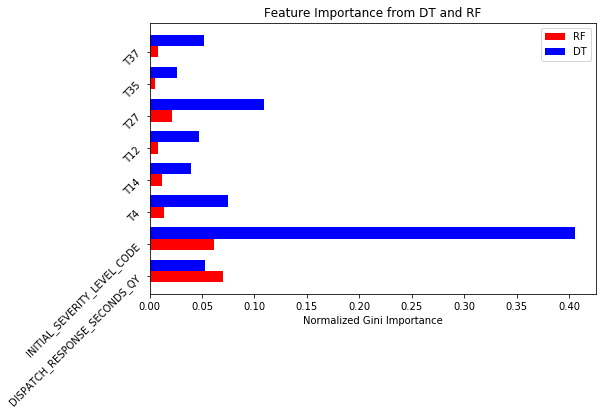

In [102]:
cols = ['DISPATCH_RESPONSE_SECONDS_QY',
          "INITIAL_SEVERITY_LEVEL_CODE", 'T4', 'T14',
         'T12', 'T27', 'T35', 'T37']

fig, ax = plt.subplots()
width=0.35

ax.barh(np.arange(len(cols)), rf_fi, width, color='r', label='RF')
ax.barh(np.arange(len(cols))+width, dt_fi, width, color='b', label='DT')

ax.set_yticks(np.arange(len(cols)))
ax.set_yticklabels(cols, rotation=45)
plt.title('Feature Importance from DT and RF')
ax.set_xlabel('Normalized Gini Importance')
plt.legend(loc=1)
plt.rcParams['figure.figsize'] = 8,5

In [103]:
fs = data_wrk[['INITIAL_SEVERITY_LEVEL_CODE', 'DISPATCH_RESPONSE_SECONDS_QY',
      'HELD_INDICATOR', 'INCIDENT_TRAVEL_TM_SECONDS_QY']]

In [104]:
import seaborn as sns

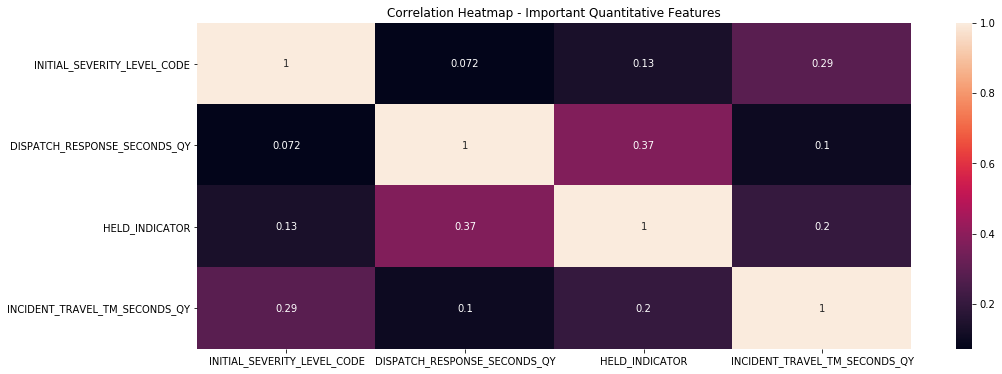

In [105]:
corr = fs.corr()

plt.figure(figsize=(16, 6))
plt.title('Correlation Heatmap - Important Quantitative Features')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True);

---

# Baseline

In [106]:
base = data_wrk

base['average'] = np.mean(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'])
np.mean(data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY'])

Xb = base.drop('INCIDENT_TRAVEL_TM_SECONDS_QY', axis=1)
Yb = base['INCIDENT_TRAVEL_TM_SECONDS_QY']

X_trainb, X_testb, Y_trainb, Y_testb = train_test_split(Xb, Yb, train_size=.75)

baseline_preds = base['average']
test_labels = Y_trainb
baseline_errors = abs(baseline_preds - test_labels)

print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'seconds')

Average baseline error:  222.32 seconds


# Baseline Models

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor

In [108]:
Class_sel.append('INCIDENT_TRAVEL_TM_SECONDS_QY')

In [109]:
model_data = OG[Class_sel]

In [110]:
data_wrk = model_data.sample(n = 1000)

In [111]:
X = data_wrk.drop('INCIDENT_TRAVEL_TM_SECONDS_QY', axis=1)
Y = data_wrk['INCIDENT_TRAVEL_TM_SECONDS_QY']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [112]:
regressor = DecisionTreeRegressor() #default is MSE creiterion
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [113]:
model_score = regressor.score(X_train,Y_train)

In [114]:
#from sklearn.metrics import mean_squared_error, r2_score
print("coefficient of determination R^2 of the prediction.: ",model_score)
y_predicted = regressor.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_test, y_predicted))

coefficient of determination R^2 of the prediction.:  1.0
Mean squared error: 155185.10
Test Variance score: -0.35


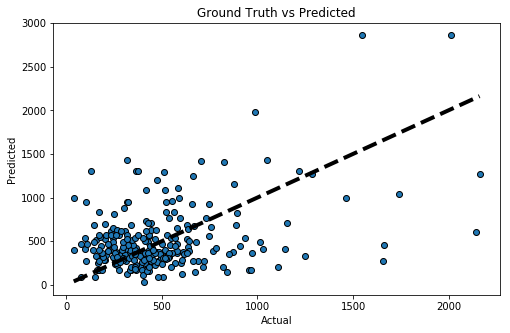

In [115]:
# So let's run the model against the test data
#from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [116]:
# Import the model we are using
# from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100)
# Train the model on training data
rf.fit(X_train, Y_train);

In [117]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = mean_squared_error(Y_test, predictions)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'seconds.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 83599.76 seconds.
Accuracy: -25691.22 %.


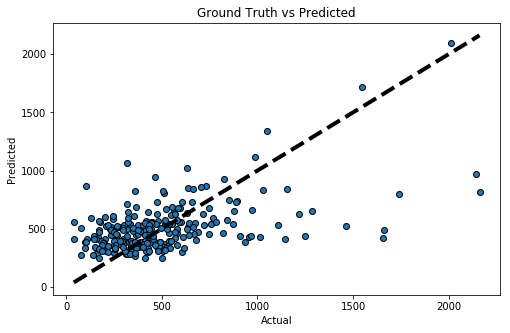

In [118]:
fig, ax = plt.subplots()
ax.scatter(Y_test, predictions, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()
plt.rcParams['figure.figsize'] = 8,5